In [1]:
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_context('talk')
#sns.set(style="ticks")

## Data augmentation

In [46]:
logsDict = {'No augmentation':'logs/cifar100_resnet50_adam_v6/20200606-150929', 'Augmentation':'logs/cifar100_resnet50_adam_v3/20200606-124719'}
datasetList = ['train', 'validation']

tagList = ["loss", "accuracy"]
logDF = pd.DataFrame()

for key, folder in logsDict.items():

    for dataset in datasetList:
        
        logFile = glob.glob(os.path.join(folder, dataset, '*v2'))[0]
        print(logFile)
        logList = []

        for idx, e in enumerate(tf.compat.v1.train.summary_iterator(logFile)):
            for v in e.summary.value:
                if any(tag in v.tag for tag in tagList):
                    r = {'experiment':key, 'dataset':dataset, 'metric': v.tag, 'value':v.simple_value}
                    logList.append(r)

        tempDF = pd.DataFrame(logList)
        nEpochs = int(len(logList)/2)
        epochList= np.array([item for sublist in [[i]*2 for i in range(0,nEpochs)] for item in sublist], dtype=int)+1
        tempDF['epoch'] = epochList

        logDF = logDF.append(tempDF)

#print([item for sublist in [[i]*2 for i in range(0, len(logList)//5)] for item in sublist])
logDF.head()

logs/cifar100_resnet50_adam_v6/20200606-150929/train/events.out.tfevents.1591456169.uvesgpu.97602.9504.v2
logs/cifar100_resnet50_adam_v6/20200606-150929/validation/events.out.tfevents.1591456219.uvesgpu.97602.31153.v2
logs/cifar100_resnet50_adam_v3/20200606-124719/train/events.out.tfevents.1591447639.uvesgpu.70193.9492.v2
logs/cifar100_resnet50_adam_v3/20200606-124719/validation/events.out.tfevents.1591447693.uvesgpu.70193.31647.v2


,experiment,dataset,metric,value,epoch
0,No augmentation,train,epoch_loss,4.302042,1
1,No augmentation,train,epoch_accuracy,0.113700,1
2,No augmentation,train,epoch_loss,3.568005,2
3,No augmentation,train,epoch_accuracy,0.230880,2
4,No augmentation,train,epoch_loss,3.100625,3


In [47]:
pivotDF = pd.pivot_table(logDF, values='value', index=['experiment', 'epoch', 'dataset'],
                            columns=['metric'], aggfunc=np.sum)

pivotDF.reset_index(inplace=True)
pivotDF.head()

metric,experiment,epoch,dataset,epoch_accuracy,epoch_loss
0,Augmentation,1,train,0.09934,4.399003
1,Augmentation,1,validation,0.13430,4.142646
2,Augmentation,2,train,0.17616,3.873369
3,Augmentation,2,validation,0.21800,3.633980
4,Augmentation,3,train,0.23660,3.515157


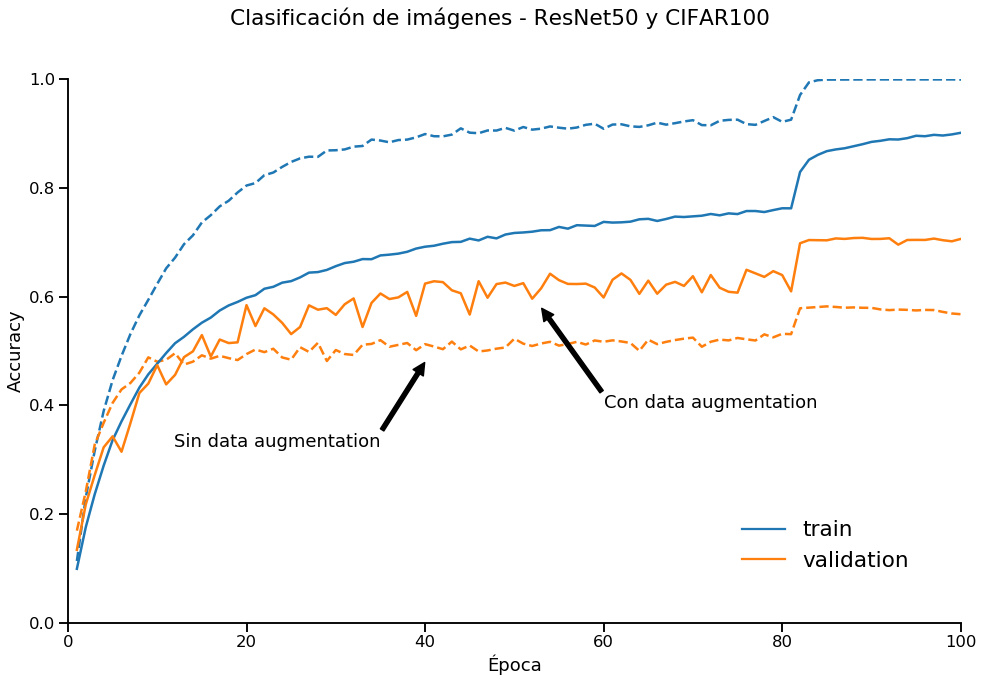

In [77]:
fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(x="epoch", y="epoch_accuracy", hue="dataset", data=pivotDF[pivotDF['experiment']=='No augmentation'],
             ax=ax, linewidth=2.5)
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")

sns.lineplot(x="epoch", y="epoch_accuracy", hue="dataset", data=pivotDF[pivotDF['experiment']=='Augmentation'],
             ax=ax, linewidth=2.5, legend=False)


handles, labels = ax.get_legend_handles_labels()
ax.legend(loc=4, handles=handles[1:], labels=labels[1:], borderaxespad=2, frameon=False, fontsize='large')

fig.suptitle('Clasificación de imágenes - ResNet50 y CIFAR100', fontsize='large')
ax.set_xlabel('Época', fontsize='medium')
ax.set_ylabel('Accuracy', fontsize='medium')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
sns.despine()

ax.annotate('Sin data augmentation', xy=(40, 0.48), xytext=(35, 0.35),
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate('Con data augmentation', xy=(53, 0.58), xytext=(60, 0.42),
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left', verticalalignment='top',
            )

fig.savefig('results/clasificacion_resnet50_cifar100.png')

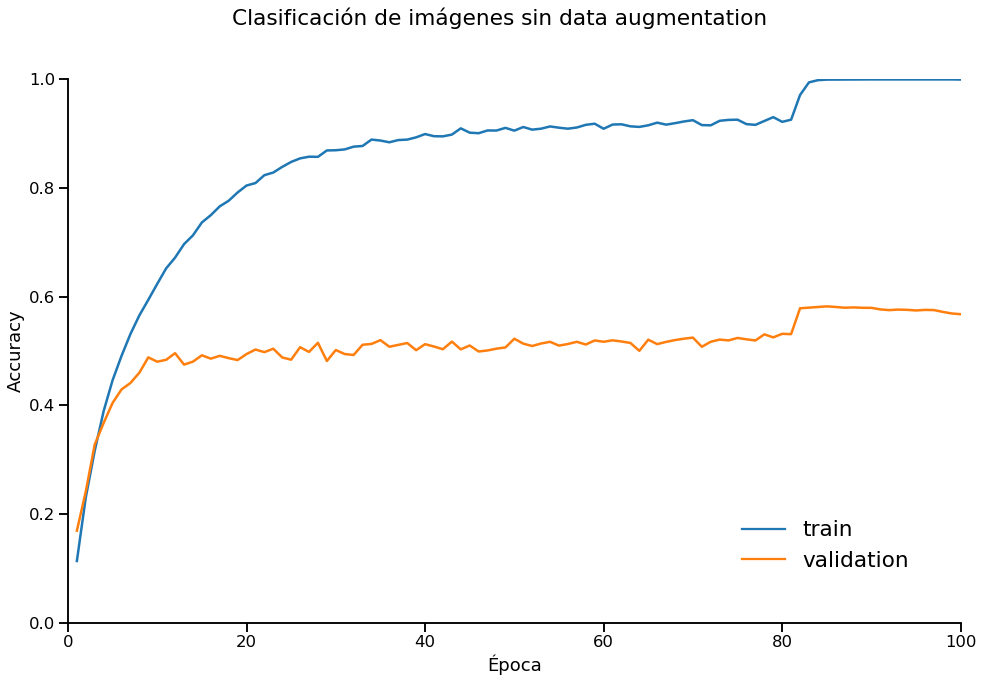

In [41]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="epoch", y="epoch_accuracy", hue="dataset", data=pivotDF[pivotDF['experiment']=='No augmentation'],
             ax=ax, linewidth=2.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc=4, handles=handles[1:], labels=labels[1:], borderaxespad=2, frameon=False, fontsize='large')

fig.suptitle('Clasificación de imágenes sin data augmentation', fontsize='large')
ax.set_xlabel('Época', fontsize='medium')
ax.set_ylabel('Accuracy', fontsize='medium')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
sns.despine()

fig.savefig('results/clasificacion_cifar100_no_data_augmentation.png')

## Learning rate

In [42]:
logsDict = {'Constant LR':'logs/imagenet_densenet_adamw_v1/20200607-161328', 'Warmup + Decaying LR':'logs/imagenet_densenet_SGD_v1/20200609-065041'}
datasetList = ['train', 'validation']

tagList = ["loss", "accuracy"]
logDF = pd.DataFrame()

for key, folder in logsDict.items():

    for dataset in datasetList:
        
        logFile = glob.glob(os.path.join(folder, dataset, '*v2'))[0]
        print(logFile)
        logList = []

        for idx, e in enumerate(tf.compat.v1.train.summary_iterator(logFile)):
            for v in e.summary.value:
                if any(tag in v.tag for tag in tagList):
                    r = {'experiment':key, 'dataset':dataset, 'metric': v.tag, 'value':v.simple_value}
                    logList.append(r)

        tempDF = pd.DataFrame(logList)
        nEpochs = int(len(logList)/2)
        epochList= np.array([item for sublist in [[i]*2 for i in range(0,nEpochs)] for item in sublist], dtype=int)+1
        tempDF['epoch'] = epochList

        logDF = logDF.append(tempDF)

#print([item for sublist in [[i]*2 for i in range(0, len(logList)//5)] for item in sublist])
logDF.head()

logs/imagenet_densenet_adamw_v1/20200607-161328/train/events.out.tfevents.1591546408.uvesgpu.122717.19808.v2
logs/imagenet_densenet_adamw_v1/20200607-161328/validation/events.out.tfevents.1591555890.uvesgpu.122717.200938.v2
logs/imagenet_densenet_SGD_v1/20200609-065041/train/events.out.tfevents.1591685462.uvesgpu.82882.19824.v2
logs/imagenet_densenet_SGD_v1/20200609-065041/validation/events.out.tfevents.1591695161.uvesgpu.82882.193978.v2


,experiment,dataset,metric,value,epoch
0,Constant LR,train,epoch_loss,4.312625,1
1,Constant LR,train,epoch_accuracy,0.183164,1
2,Constant LR,train,epoch_loss,2.928584,2
3,Constant LR,train,epoch_accuracy,0.363741,2
4,Constant LR,train,epoch_loss,2.668706,3


In [43]:
pivotDF = pd.pivot_table(logDF, values='value', index=['experiment', 'epoch', 'dataset'],
                            columns=['metric'], aggfunc=np.sum)

pivotDF.reset_index(inplace=True)
pivotDF.head()

metric,experiment,epoch,dataset,epoch_accuracy,epoch_loss,epoch_top_5_accuracy
0,Constant LR,1,train,0.183164,4.312625,NaN
1,Constant LR,1,validation,0.256300,3.630564,NaN
2,Constant LR,2,train,0.363741,2.928584,NaN
3,Constant LR,2,validation,0.308900,3.320734,NaN
4,Constant LR,3,train,0.408242,2.668706,NaN


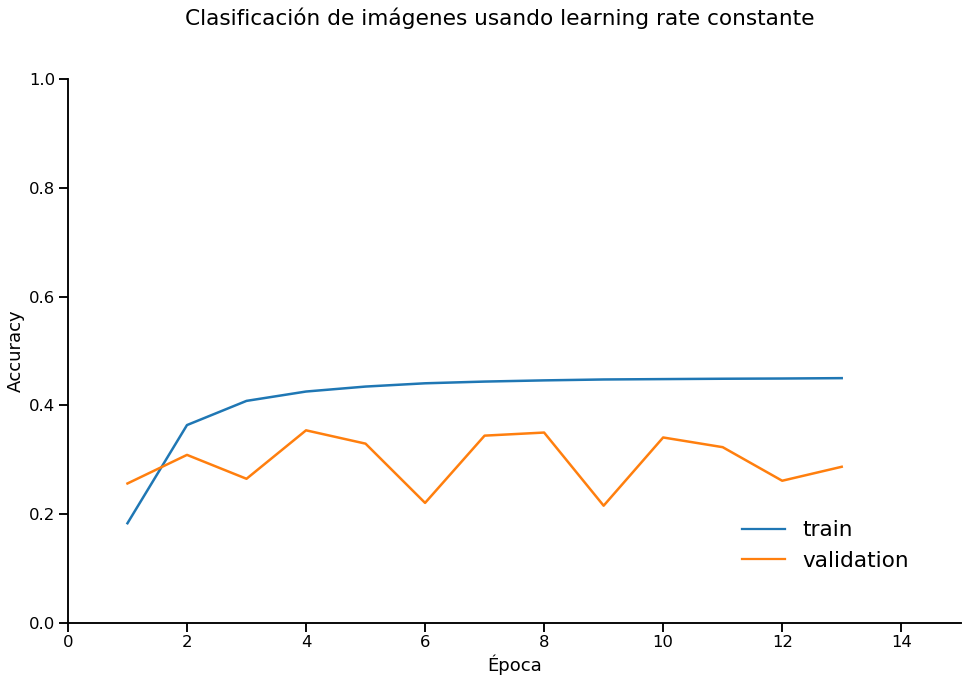

In [44]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="epoch", y="epoch_accuracy", hue="dataset", data=pivotDF[pivotDF['experiment']=='Constant LR'],
             ax=ax, linewidth=2.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc=4, handles=handles[1:], labels=labels[1:], borderaxespad=2, frameon=False, fontsize='large')

fig.suptitle('Clasificación de imágenes usando learning rate constante', fontsize='large')
ax.set_xlabel('Época', fontsize='medium')
ax.set_ylabel('Accuracy', fontsize='medium')
ax.set_xlim(0, 15)
ax.set_ylim(0, 1)
sns.despine()

fig.savefig('results/clasificacion_imagenet_constant_LR.png')

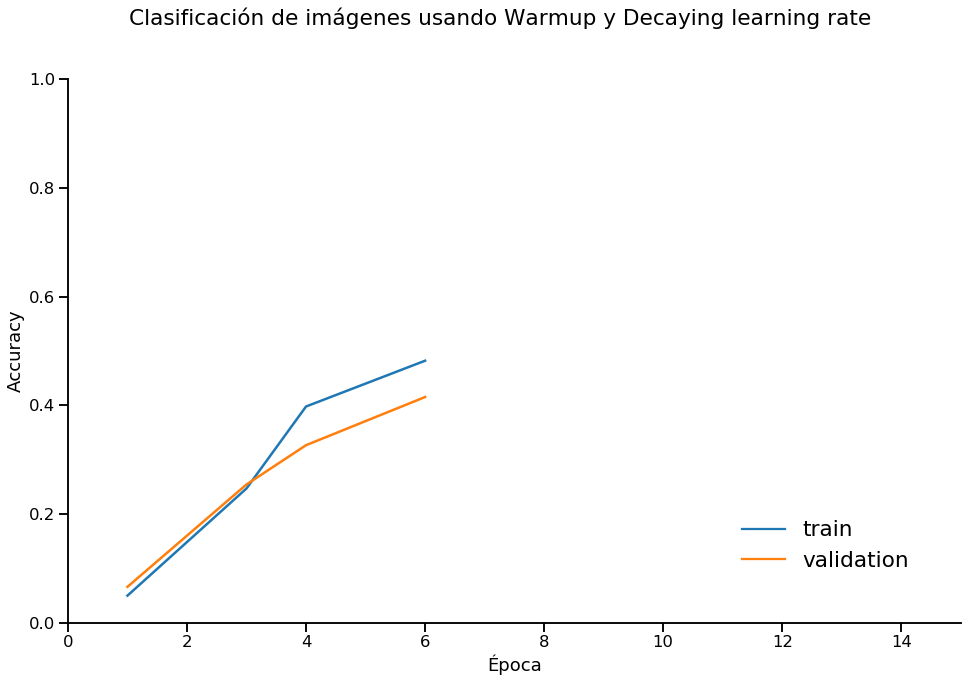

In [45]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="epoch", y="epoch_accuracy", hue="dataset", data=pivotDF[pivotDF['experiment']=='Warmup + Decaying LR'],
             ax=ax, linewidth=2.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc=4, handles=handles[1:], labels=labels[1:], borderaxespad=2, frameon=False, fontsize='large')

fig.suptitle('Clasificación de imágenes usando Warmup y Decaying learning rate', fontsize='large')
ax.set_xlabel('Época', fontsize='medium')
ax.set_ylabel('Accuracy', fontsize='medium')
ax.set_xlim(0, 15)
ax.set_ylim(0, 1)
sns.despine()

fig.savefig('results/clasificacion_imagenet_warmup_decaying_LR.png')